# LSTM (Hourly)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt

In [2]:
#!pip install keras
#!pip install tensorflow

# Import Data

In [3]:
df = pd.read_csv('aggregate_data.csv')
df.sort_values(by='date',ascending=False)
df

,date,close,high,low,open,volume,sma5,sma10,sma15,sma20,...,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
0,2015-02-02 10:18:00+05:30,131339.90,131375.10,131302.53,131325.13,609188,131324.612,131343.600,131382.266000,131407.0495,...,4242.451361,5139.981011,4543.348734,4284.915034,-4773.161292,139.259557,75.72,131339.176667,2391.521163,21.041367
1,2015-02-02 10:19:00+05:30,131303.61,131368.07,131268.38,131342.64,693540,131322.022,131338.209,131365.417333,131399.8400,...,4211.623197,3954.944584,4468.296823,4303.308823,-4942.009553,136.546017,101.27,131313.353333,2370.485111,18.040339
2,2015-02-02 10:20:00+05:30,131248.36,131321.94,131217.80,131300.96,1610837,131303.796,131328.486,131348.264667,131388.6160,...,3862.393006,2840.307256,3978.410951,4115.856089,-5387.322962,134.329159,105.51,131262.700000,2351.023435,16.246702
3,2015-02-02 10:21:00+05:30,131257.97,131304.23,131209.05,131243.00,934932,131294.402,131315.095,131336.512000,131378.0600,...,3527.549677,3419.157833,3404.803225,4190.866180,-5136.397490,131.636362,96.63,131257.083333,2328.956512,28.036258
4,2015-02-02 10:22:00+05:30,131297.42,131329.43,131222.76,131257.06,1012966,131289.452,131307.606,131329.189333,131367.3655,...,3783.520863,4982.998418,3747.487836,4378.816472,-4275.330925,129.867336,106.87,131283.203333,2304.101743,23.595730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639976,2022-10-24 19:10:00+05:30,260762.30,260861.80,260619.30,260764.20,1338179,260701.840,260676.380,260732.273333,260756.1000,...,5812.817423,5723.215673,6339.296397,4900.557475,-3776.821766,276.233018,246.95,260747.800000,1888.976858,24.784875
639977,2022-10-24 19:11:00+05:30,260751.35,260898.20,260615.20,260788.30,1268550,260737.590,260673.490,260727.350000,260751.0125,...,5692.451293,4952.129379,5659.698669,4938.590525,-3853.783316,276.719945,283.05,260754.916667,1895.574295,28.911954
639978,2022-10-24 19:12:00+05:30,260810.85,260929.15,260631.85,260778.65,2678132,260766.770,260682.455,260725.903333,260748.2900,...,5574.213174,4522.644499,5065.996517,5315.854811,-3811.398143,278.307806,298.95,260790.616667,1895.013164,23.481135
639979,2022-10-24 19:13:00+05:30,260856.45,260979.45,260677.20,260822.40,1435058,260787.580,260699.140,260725.496667,260749.5525,...,5493.144531,5228.295344,4901.023074,5279.008055,-3460.688845,280.082248,303.15,260837.700000,1896.095788,12.334048


In [4]:
#df['date'] = pd.to_datetime(df['date']).dt.date
#df.sort_values(by='date',ascending=False)
#df = df.groupby(["date"]).mean()
#df

# Data Descriptions

In [5]:
df.describe()

,close,high,low,open,volume,sma5,sma10,sma15,sma20,ema5,...,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
count,639981.000000,639981.000000,639981.000000,639981.000000,6.399810e+05,639981.00000,639981.000000,639981.000000,639981.000000,639981.000000,...,639981.000000,639981.000000,639981.000000,639981.000000,639981.000000,639981.000000,639981.000000,639981.000000,639981.000000,639981.000000
mean,178874.198665,178960.175608,178787.000417,178875.126847,1.745660e+06,178874.16656,178873.875870,178873.514460,178873.137972,178874.112645,...,4399.485440,4373.091593,4373.689316,4435.800197,-4386.520147,178.862488,178.064387,178873.791563,1853.523129,33.244640
std,45155.493690,45178.179796,45130.670542,45155.830600,1.926488e+06,45155.04414,45154.661068,45154.321464,45154.009852,45155.025937,...,910.656852,1340.251410,1117.982559,379.700375,1071.889815,101.714378,159.805453,45154.756440,112.134804,12.601085
min,102403.680000,102781.680000,102212.560000,102673.620000,1.175000e+03,105891.74400,106103.767000,106210.942667,106260.348500,105882.276439,...,752.958641,0.000000,244.507343,1394.431082,-8507.522826,41.070314,2.600000,102465.973333,1426.250389,-173.038641
25%,143955.960000,144016.330000,143893.060000,143956.030000,7.341020e+05,143957.43600,143958.891000,143964.002667,143965.266500,143957.289111,...,3796.193122,3461.127929,3616.886511,4196.204165,-5082.969518,109.882361,104.670000,143955.310000,1779.034468,25.303127
50%,168694.690000,168765.710000,168621.470000,168695.550000,1.194994e+06,168697.86200,168697.720000,168697.540000,168698.727000,168697.331777,...,4419.124333,4369.243497,4366.693903,4446.028542,-4350.587152,155.252357,150.360000,168694.840000,1843.099899,32.682850
75%,208147.850000,208266.650000,208007.500000,208147.950000,2.067166e+06,208141.40000,208123.380000,208122.990000,208107.877500,208131.423112,...,5016.602462,5280.668727,5121.129015,4685.764941,-3659.172360,216.804039,213.060000,208137.633333,1915.434627,40.521968
max,278038.700000,278647.900000,277844.850000,278046.200000,1.627640e+08,277940.40000,277883.150000,277753.010000,277723.747500,277921.085538,...,8138.938176,8800.000000,8654.165077,6382.397508,-361.037813,2759.298419,19544.110000,278026.233333,2789.482235,439.125440


<AxesSubplot:>

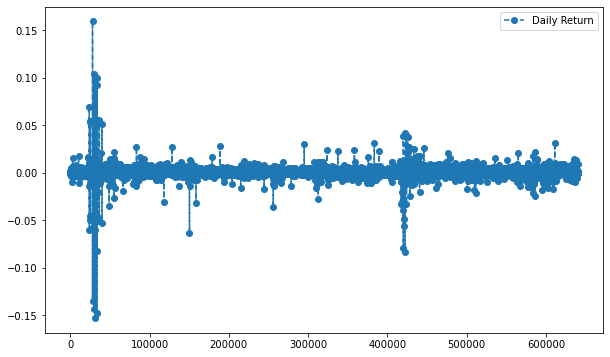

In [6]:
df['Daily Return'] = df['close'].pct_change()

df['Daily Return'].plot(legend=True, linestyle='--', marker='o',figsize=(10,6))

In [7]:
df['Daily Return']

0              NaN
1        -0.000276
2        -0.000421
3         0.000073
4         0.000301
            ...   
639976    0.000021
639977   -0.000042
639978    0.000228
639979    0.000175
639980    0.000115
Name: Daily Return, Length: 639981, dtype: float64

Text(0, 0.5, 'Counts')

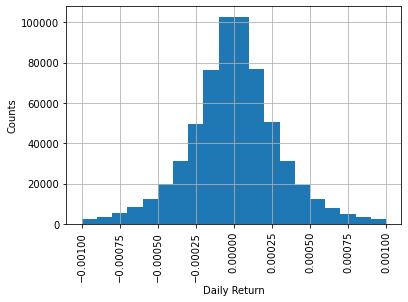

In [8]:
df['Daily Return'].hist(bins=20, range=[-.001, .001])
plt.xticks(rotation='vertical')
plt.xlabel('Daily Return')
plt.ylabel('Counts')

# Data Preprocessing

In [9]:
df['date'] = pd.to_datetime(df['date']).dt.strftime("%Y-%m-%d %H")
df.sort_values(by='date',ascending=False)
df = df.groupby(["date"]).mean()
df
#df['date']

,close,high,low,open,volume,sma5,sma10,sma15,sma20,ema5,...,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA,Daily Return
date,,,,,,,,,,,,,,,,,,,,,
2015-02-02 10,131351.241429,131405.065476,131294.757143,131349.041905,8.519204e+05,131348.263667,131344.915381,131341.974968,131342.690226,131348.421938,...,4469.087076,4466.379865,4504.105760,-4231.520031,124.045396,114.038095,131350.354683,2024.163609,22.864049,7.620936e-06
2015-02-02 11,131329.062167,131387.910667,131285.734167,131336.539500,6.835697e+05,131338.728567,131347.289417,131355.708733,131362.811408,131338.003473,...,4097.529024,4128.638589,3971.005333,-5050.234111,104.275705,105.335000,131334.235667,1838.824635,28.657367,-4.316216e-05
2015-02-02 12,130994.521000,131051.103167,130942.365667,130996.569500,6.156270e+05,131002.113533,131016.464300,131031.384233,131047.338792,131003.068329,...,4392.585443,4355.280310,4220.934864,-4721.778217,114.746291,111.611667,130995.996611,1840.693884,28.622660,-1.991254e-05
2015-02-02 13,131081.648333,131141.744667,131016.828500,131070.825167,1.038486e+06,131065.216067,131043.428383,131022.262333,131002.707267,131065.060217,...,4436.237178,4466.253646,4385.514008,-4184.161140,121.515037,129.389667,131080.073833,1869.942354,27.628968,5.972330e-05
2015-02-02 14,131375.910333,131439.679000,131310.444500,131372.621000,9.921741e+05,131369.374467,131367.069733,131368.169533,131371.218358,131370.776578,...,4322.162177,4280.207133,4205.007441,-4824.392130,132.393153,134.378833,131375.344611,1784.430515,32.454837,3.365364e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-21 13,259652.233636,259759.149091,259560.440000,259663.314545,1.179867e+06,259680.502545,259724.732182,259764.572061,259798.946364,259681.924360,...,4164.640063,4076.289951,4168.909479,-5427.973975,187.333676,200.840909,259657.274242,1956.016138,31.187926,-6.509548e-05
2022-10-21 14,258618.822500,258748.862500,258488.642500,258626.825833,1.255584e+06,258644.988500,258677.060750,258713.435000,258749.174583,258645.156948,...,4532.256466,4577.447625,4447.788506,-4622.957325,258.397411,263.057500,258618.775833,1890.833004,37.306477,-5.399814e-05
2022-10-21 15,258738.966667,258869.853333,258587.221667,258724.311667,3.040783e+06,258715.290333,258682.658833,258653.034556,258629.350500,258714.551285,...,4384.436820,4376.850038,4617.206477,-3805.991602,269.659053,284.295000,258732.013889,1944.339920,32.864638,4.902209e-05


In [10]:
# NORMALIZING DATA

#import numpy as np

# Compute the previous response
#previous_response = np.roll(df1, 1)

# Compute the scaling factor
#scaling_factor = df1 / previous_response

# Normalize the data
#df1 = df1 * scaling_factor

#print(df1)

In [11]:
df1 = df.reset_index()['close']
#df1 = df1.head(10000)
df1

0        131351.241429
1        131329.062167
2        130994.521000
3        131081.648333
4        131375.910333
             ...      
12336    259652.233636
12337    258618.822500
12338    258738.966667
12339    260985.861111
12340    260725.736667
Name: close, Length: 12341, dtype: float64

# Train/Test Split

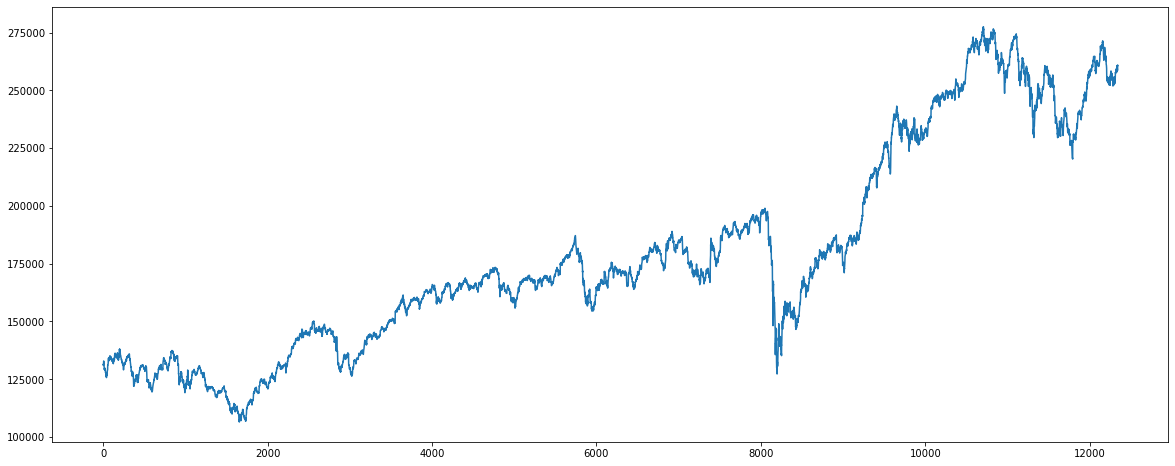

In [12]:
plt.figure(figsize=(20,8))
plt.plot(df1)

In [13]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
training_size=int(len(df1)*0.8)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [15]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [17]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [18]:
X_train.shape[1]

100

In [19]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences = True,  input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-traina

# Model

In [21]:
model.fit(X_train, y_train, epochs=20, batch_size=64, shuffle=False)

Epoch 1/20
153/153 [==============================] - 17s 86ms/step - loss: 0.0058
Epoch 2/20
153/153 [==============================] - 13s 87ms/step - loss: 0.0094
Epoch 3/20
153/153 [==============================] - 13s 88ms/step - loss: 0.0113
Epoch 4/20
153/153 [==============================] - 13s 87ms/step - loss: 0.0104
Epoch 5/20
153/153 [==============================] - 13s 88ms/step - loss: 0.0065
Epoch 6/20
153/153 [==============================] - 13s 85ms/step - loss: 0.0034
Epoch 7/20
153/153 [==============================] - 13s 86ms/step - loss: 0.0017
Epoch 8/20
153/153 [==============================] - 13s 86ms/step - loss: 0.0012
Epoch 9/20
153/153 [==============================] - 13s 87ms/step - loss: 7.6296e-04
Epoch 10/20
153/153 [==============================] - 13s 86ms/step - loss: 6.3092e-04
Epoch 11/20
153/153 [==============================] - 13s 86ms/step - loss: 5.6204e-04
Epoch 12/20
153/153 [==============================] - 13s 86ms/step - lo

In [22]:
test_predict = model.predict(X_test)

74/74 [==============================] - 2s 21ms/step


In [23]:
print(f'MSE {mean_squared_error(y_test, test_predict)}')
print(f'R2 {r2_score(y_test, test_predict)}')

MSE 0.013173515571123043
R2 -1.3836271699761338


In [24]:
test_predict= scaler.inverse_transform(test_predict)
train_predict = model.predict(X_train)
train_predict=scaler.inverse_transform(train_predict)

306/306 [==============================] - 7s 21ms/step


In [25]:
look_back = 100

trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# Results

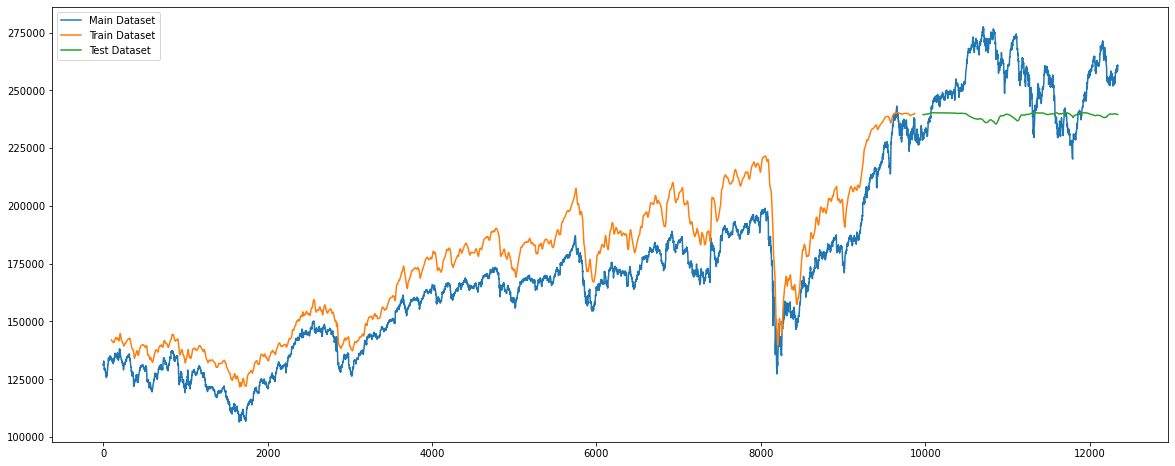

In [26]:
plt.figure(figsize=(20,8))
plt.plot(scaler.inverse_transform(df1), label = 'Main Dataset')
plt.plot(trainPredictPlot, label = 'Train Dataset')
plt.plot(testPredictPlot, label = 'Test Dataset')
plt.legend()

In [27]:
x_input = df1[len(df1)-100:].reshape(1,-1)

In [28]:
x_input = x_input.reshape((1,100,1))
y_predict = model.predict(x_input, verbose = 0)
next_day_value = scaler.inverse_transform(y_predict)

In [29]:
next_day_value

array([[239528.7]], dtype=float32)